# Enhanced Equivalence Projective Simulation 
This code simulates the "enhanced equivalence projective simulation" model that uses 
[Projective Simulation (PS)](https://projectivesimulation.org) framework for computationaly 
modeling equivalence class formation in Behavior analysis. To model the formation of *derived relations*, the model uses [Network Enhancement (NE)](https://www.nature.com/articles/s41467-018-05469-x).
This code is used for producing results in paper:

**[Mofrad, A. A., Yazidi, A., Mofrad, S. A., Hammer, H. L., & Arntzen, E. (2021). Enhanced Equivalence Projective Simulation: A Framework for Modeling Formation of Stimulus Equivalence Classes. Neural computation, 33(1), 1-45.](https://www.mitpressjournals.org/doi/full/10.1162/neco_a_01346)**

and is an extention of the "equivalence projective simulation" model which is introduced in

**[Mofrad, A. A., Yazidi, A., Hammer, H. L., & Arntzen, E. (2020). Equivalence Projective Simulation as a Framework for Modeling Formation of Stimulus Equivalence Classes. Neural Computation, 32(5), 912-968.](https://www.mitpressjournals.org/doi/full/10.1162/neco_a_01274)**


Overally, in the simulation 
- Fisrt some relations say A1-B1, A2-B2, B1-C1, B2-C2, are trained through a matching-to-sample procedure. 
- Then, after mastery of agent in these relations, i.e. answering correctly to say 90% of the trials in a block of certain size of trials, the agent will be tested.
- The test could be the relations that are trained directly, or some relations that are not explicitly traind, say **derived** relations.
- A protocol is a road map to which relations must be trained, what is the criteria for mastery, what is the testing relations, etc. 
- Interaction between agent and Environment, is by passing a matching-to-sample trial to the agent, passing the agent choice to the Environment, and the feedback/reward -in the training phase- to the agent.  


## Part 1: Initialization of Environment Parameters
For the python code, the details of protocol must be changed in initialization_detail.py. More general parameters can be changed in initialization.py. Alternatively you can change the detail below and run this notebook.
#### (In initialization.py)
**experiment_ID**: A positive number which is used for saving the results in the results folder. The file name would be: 
'Env_**environment_ID**_ExpID_**experiment_ID**'
    
**environment_ID**: Is the key to the defult ID numbers, that adress the details of a protocol

**max_trial**: The maximum number of allowed trials in the training phase. If the learning is so slow due to the parameters, the training might not be finished

**num_agents**: The number of participants (agents); The program will be repeated for num_agents times and the final result would be the average

**size_action_set**: The number of comparison stimuli in the experiment. This must be at least 2 and at most the num_classes

In [1]:
## You can change the valuses to run a new experiment
def environment_parameters():

    """
    The initial setting data. All must be positive digits.
    """

    environment_parameter = {
                             "experiment_ID": [1],
                             "environment_ID": [3],
                             "max_trial": [10000],
                             "num_agents": [1000],
                             "size_action_set": [3]
                             }

    return environment_parameter

### Adding new Experiments (Environment Setting)
#### (In initialization_detail.py)
**num_classes**: Is the number of classes in the experiment. It must be compatible with training_order

**training_order**: The structure of training and blocks in dict() format. There are two ways to initialize it though:

- First: let num_classes=4, and size_action_set=3, and

     training_order={
                     1: [('A', 'B', 40)], 
                     2: [('B', 'C', 40)], 
                     3: [('D', 'C', 40)] 
                     }.
     
     The numbers 1,2,3 shows the order of training. As an example, the first block contains 30 trials of relations with A1, A2, A3, or A4 as the sample stimuli and three comparison stimuli from B1, B2, B3, and B4. Note that the correct choice must be among the comparison stimuli, say for A2, (B1, B3, B4) is not a valid action set/comparison stimuli. Moreover that number of trials at each block must be a multiple of num_classes. Since, the model produce the same number of trial for each particular pair. 
 
- Second: let num_classes=2, and size_action_set=2, and

     training_order={
                     1:[('A1', 'B1', 10)],
                     2:[('A2', 'B2', 10)],
                     3:[('A1', 'B1', 5),('A2', 'B2', 5)],
                     4:[('A1', 'C1', 10)],
                     5:[('A2', 'C2', 10)],
                     6:[('A1', 'C1', 5),('A2', 'C2', 5)],
                     7:[('A1', 'B1', 2),('A2', 'B2', 2),('A1', 'C1', 2),('A2', 'C2', 2)]
                    }
     This case, the desired relation to be trained in each block and the number of its repetition is determined. The num_classes must be compatible with the provided relations. The above training_order means after mastery of relation A1-B1 in blocks of 10 trials, A2-B2 will be trained, then a block of mixed A1-B1 and A2-B2. Next, A1-C1, then A2-C2 and then a mixed block of A1-C1, A2-C2. Finally, all the trained relations will make a block and by passing the mastery criteria, the training phase will be finished.   
                  
    In order to preperation of the results, two other dict() needs to be set in accordance with the training_order:

    - **plot_blocks**: That is an option for desired combination of relasions, say:
        
        plot_blocks= {
                        'Direct':['AB', 'BC', 'DC'],
                        'Derived':['BA', 'CB', 'CD', 'AC', 'CA', 'BD', 'DB', 'AD', 'DA']}.
              
        where 'AB' means all possible relations between the two categories say A1-B1, A2-B2, A3-B3, etc. One must set it as empty dict() to remove this extra plot. 
        
        "plot_blocks_ID": {'relatin_type':['Direct','Derived']}

**mastery_training**: A value between 0 and one that shows the mastery criteria. $0.9$ means $90\%$ correct choices in a block.

In [2]:
# See initialization_detail.py for more experiment samples 
def environment_parameters_details(ID):
    """
    Do not change this part
    """
    details = environment_details()
    return details[ID]['num_classes'], details[ID]['training_order'], \
    details[ID]['plot_blocks'], details[ID]['plot_blocks_ID'], \
    details[ID]['mastery_training']

# You can add a new entery into the dictionary. The Key must be changed in the
# environment_parameters() in the above python cell.
# "environment_ID": [key] 
def environment_details():

    """
    Here the information for the environment will be provided.
    The number is what in the interaction file must be specified.
    plot_blocks shows representation for bar diagrams.
    """

    environment_parameters_detail = {
    1: { # This is the example at the paper
        "num_classes":3,
        "training_order": {
                           1:[('A','B',30)],
                           2:[('B','C',30)],
                           3:[('D','C',30)]
                           },

        "plot_blocks": {
                        'relation_type':{'Direct':['AB','BC','DC'],
                        'Derived':['BA','CB','CD','AC','CA','BD','DB','AD','DA']}
                        },

        "plot_blocks_ID": {
                           'relation_type':['Direct','Derived']
                           },

        "mastery_training":  0.9
        },

    2: { # This is the Sidman and Tailby experiment (1982)
        "num_classes": 3,
        "training_order": {
                           1:[('A1','B1',10),('A2','B2',10)],
                           2:[('A1','B1',10),('A3','B3',10)],
                           3:[('A2','B2',10),('A3','B3',10)],
                           4:[('A1','B1',10),('A2','B2',10),('A3','B3',10)],
                           5:[('A1','C1',10),('A2','C2',10)],
                           6:[('A1','C1',10),('A3','C3',10)],
                           7:[('A2','C2',10),('A3','C3',10)],
                           8:[('A1','C1',10),('A2','C2',10),('A3','C3',10)],
                           9: [('A1','B1',5),('A2','B2',5),('A3','B3',5),
                               ('A1','C1',5),('A2','C2',5), ('A3','C3',5)],
                           10: [('D1','C1',10),('D2','C2',10)],
                           11:[('D1','C1',10),('D3','C3',10)],
                           12: [('D2','C2',10),('D3','C3',10)],
                           13:[('D1','C1',10),('D2','C2',10),('D3','C3',10)],
                           14:[('A1','B1',5),('A2','B2',5),('A3','B3',5),
                               ('A1','C1',5),('A2','C2',5), ('A3','C3',5),
                               ('D1','C1',5),('D2','C2',5),('D3','C3',5)]
                           },

        "plot_blocks": {
                        'relation_type':{'Baseline':['AB','AC','DC'],
                        'Symmetry':['BA','CA','CD'],
                        'Equivalence':['BC','CB','BD','DB','AD','DA']}
                        },

        "plot_blocks_ID": {
                           'relation_type':['Baseline','Symmetry','Equivalence']
                          },

        "mastery_training": 0.9
        },


    3: { # This is the Devany et. al. experiment (1986)
        "num_classes": 2,
        "training_order": {
                           1:[('A1','B1',10)],
                           2:[('A2','B2',10)],
                           3:[('A1','B1',5),('A2','B2',5)],
                           4:[('A1','C1',10)],
                           5:[('A2','C2',10)],
                           6:[('A1','C1',5),('A2','C2',5)],
                           7: [('A1','B1',2),('A2','B2',2),('A1','C1',2),
                               ('A2','C2',2)]
                           },

        "plot_blocks": {
                        'relation_type':{'Baseline':['AB','AC'],'Symmetry':['BA','CA'],
                                        'Equivalence':['BC','CB']}
                        },

        "plot_blocks_ID": {'relation_type':['Baseline','Symmetry','Equivalence']},

        "mastery_training": 0.9
        },

# This is the Spencer and Chase experiment (1996)
    4: { #
        "num_classes": 3,
        "training_order": {
                           1:[('A','B',48)],
                           2:[('A','B',24),('B','C',24)],
                           3:[('A','B',12),('B','C',12),('C','D',24)],
                           4:[('A','B',9),('B','C',9),('C','D',9),('D','E',24)],
                           5:[('A','B',6),('B','C',6),('C','D',6),('D','E',6),
                              ('E','F',24)],
                           6:[('A','B',3),('B','C',3),('C','D',3),('D','E',6),
                              ('E','F',9),('F','G',24)],
                           7:[('A','B',3),('B','C',3),('C','D',3),('D','E',3),
                              ('E','F',3),('F','G',3)]
                           },

        "plot_blocks": {
                        'nodal_distance':{
                                          'Bsl':['AB','BC','CD','DE','EF','FG'],
                                          'Sym':['BA','CB','DC','ED','FE','GF'],
                                          '1-Tr':['AC','BD','CE','DF','EG'],
                                          '2-Tr':['AD','BE','CF','DG'],
                                          '3-Tr':['AE','BF','CG'],
                                          '4-Tr':['AF','BG'],
                                          '5-Tr':['AG'],
                                          '1-Eq':['CA','DB','EC','FD','GE'],
                                          '2-Eq':['DA','EB','FC','GD'],
                                          '3-Eq':['EA','FB','GC'],
                                          '4-Eq':['FA','GB'],
                                          '5-Eq':['GA']
                                          },
                        'relation_type':{
                                        'Baseline':['AB','BC','CD','DE','EF','FG'],
                                        'Symmetry':['BA','CB','DC','ED','FE','GF'],
                                        'Transivity':['AC','BD','CE','DF','EG',
                                                      'AD','BE','CF','DG','AE',
                                                      'BF','CG','AF','BG','AG'],
                                        'Equivalence':['CA','DB','EC','FD','GE',
                                                       'DA','EB','FC','GD','EA',
                                                       'FB','GC','FA','GB','GA']
                                        }
                        },

         "plot_blocks_ID": {
                            'nodal_distance':['Bsl','Sym','1-Tr','2-Tr','3-Tr',
                                              '4-Tr','5-Tr','1-Eq','2-Eq','3-Eq',
                                              '4-Eq','5-Eq'],
                            'relation_type':['Baseline','Symmetry',
                                            'Transivity','Equivalence']
                            },

        "mastery_training": 0.9
        },

        }

    return environment_parameters_detail

## Part 2: Initialization of Agent Parameters
#### (In initialization.py)

**network_enhancement**: Could be `['True', 'False']`. If `'True'`, retrieval is based on *Symmetric Network Enhancement (SNE)*. If `'False'`, retrieval is based on *Directed Network Enhancement (DNE)*

**gamma_damping**: A float number between 0 and 1 which controls forgetting/damping of h-values. The closser to zero, the less forgetting and the closer to one, the less learning/memory.

**beta_h**: float >=0, probabilities are proportional to exp(beta_softmax*h_value) and finding the appropriate value is very important. Being used for converting h-values to probabilities during training and to generate the Network enhancement input. In general, its higher value, increases the chance of a connection with the largest h-value to be chosen.

**beta_t**: float >=0, controls agent's function in a trial at test phase (derived relation).

**K**: Is a positive value for symmetry relation. K=1 means that
 the relations are bidirectional and network is symmetric at the end of the training phase.

**alpha**: The regularization parameter

In [3]:
## You can change the valuses to run a new experiment
def agent_parameters():

    """
    This is an initialization for agent parameters based on the agent type.
    """

    agent_parameter = {
                       "network_enhancement": [False],
                       "beta_h": [0.07],
                       "beta_t": [8],
                       "K": [1],
                       "gamma_damping": [0.001],
                       "alpha": [0.8]
                       }

    return agent_parameter

In [4]:
def config():
    return environment_parameters(), agent_parameters()

## Part 3: Importing Classes and run the experiment
**The running process is as follows:**
- An agent, an environment, and an intreaction object will be initializes

- The results to be ploted will be saved in a pickle file in the "results" folder.

- Results of a previousely simulated data can be accessed by its ID.

---*Agent Setting*---
   network_enhancement  beta_h  beta_t  K  gamma_damping  alpha
0                False    0.07       8  1          0.001    0.8

---*Environment Setting*---
   experiment_ID  environment_ID  max_trial  num_agents  size_action_set
0              1               4      10000        1000                3


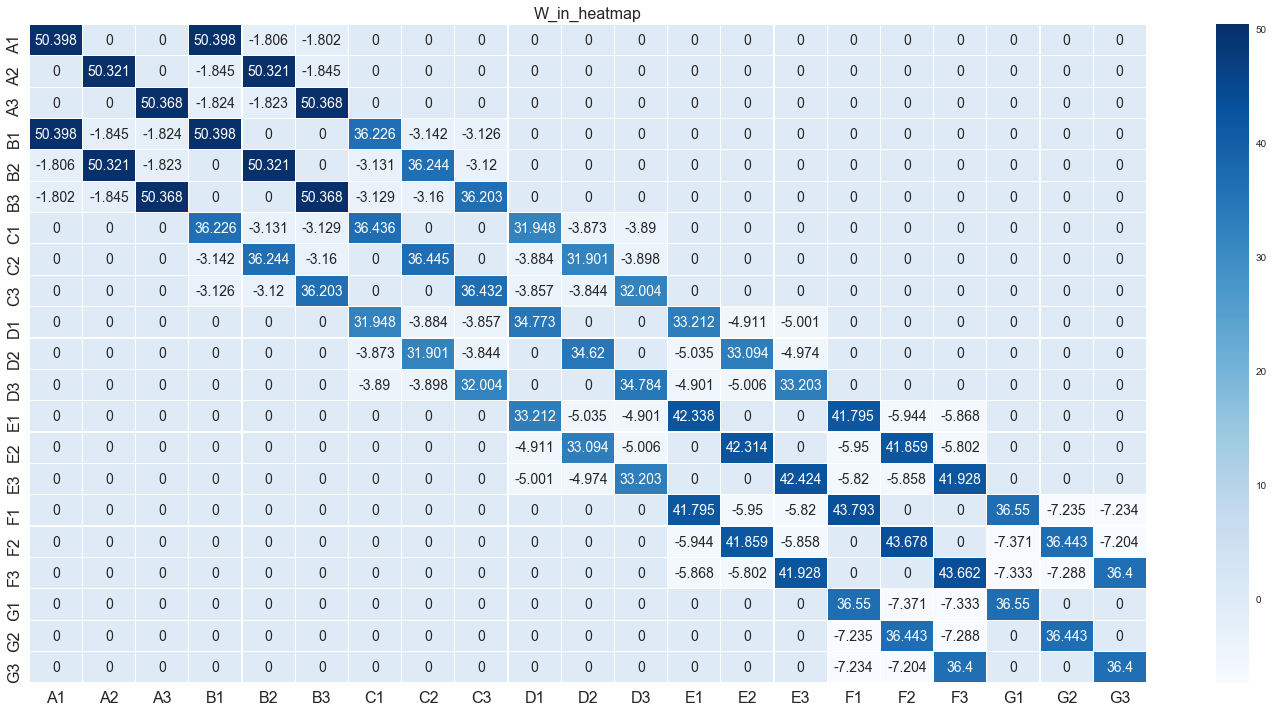

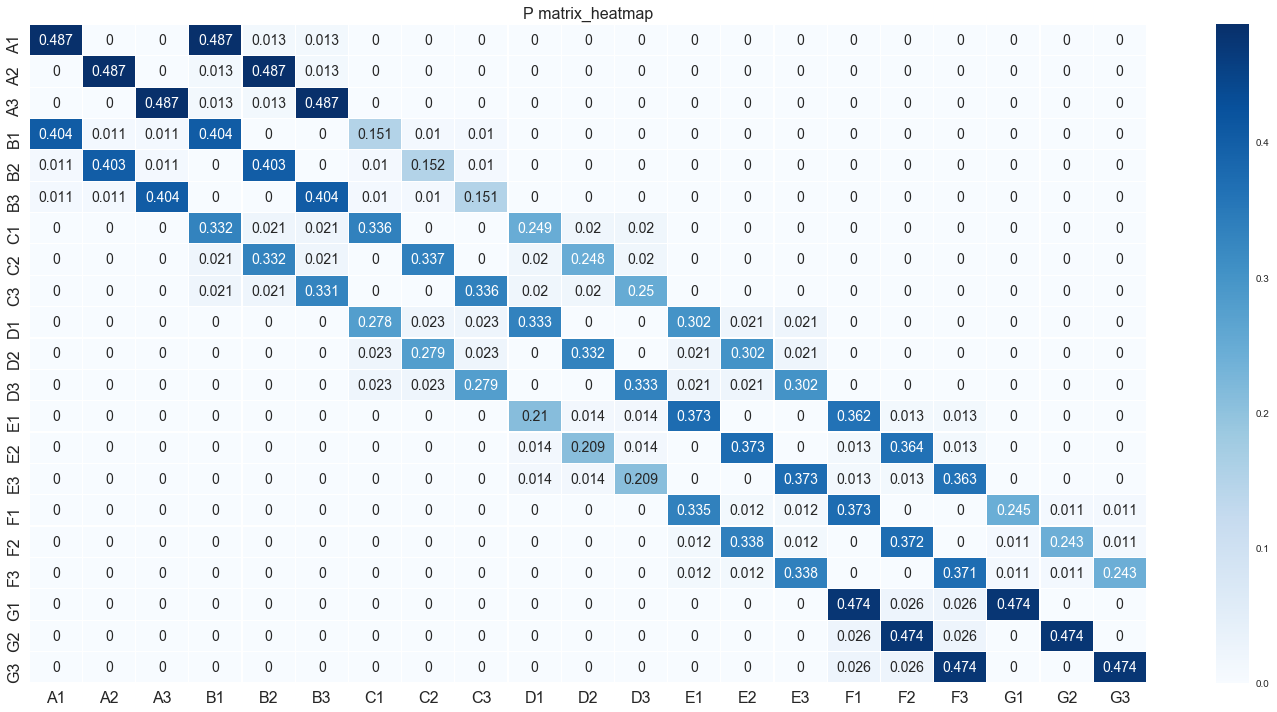

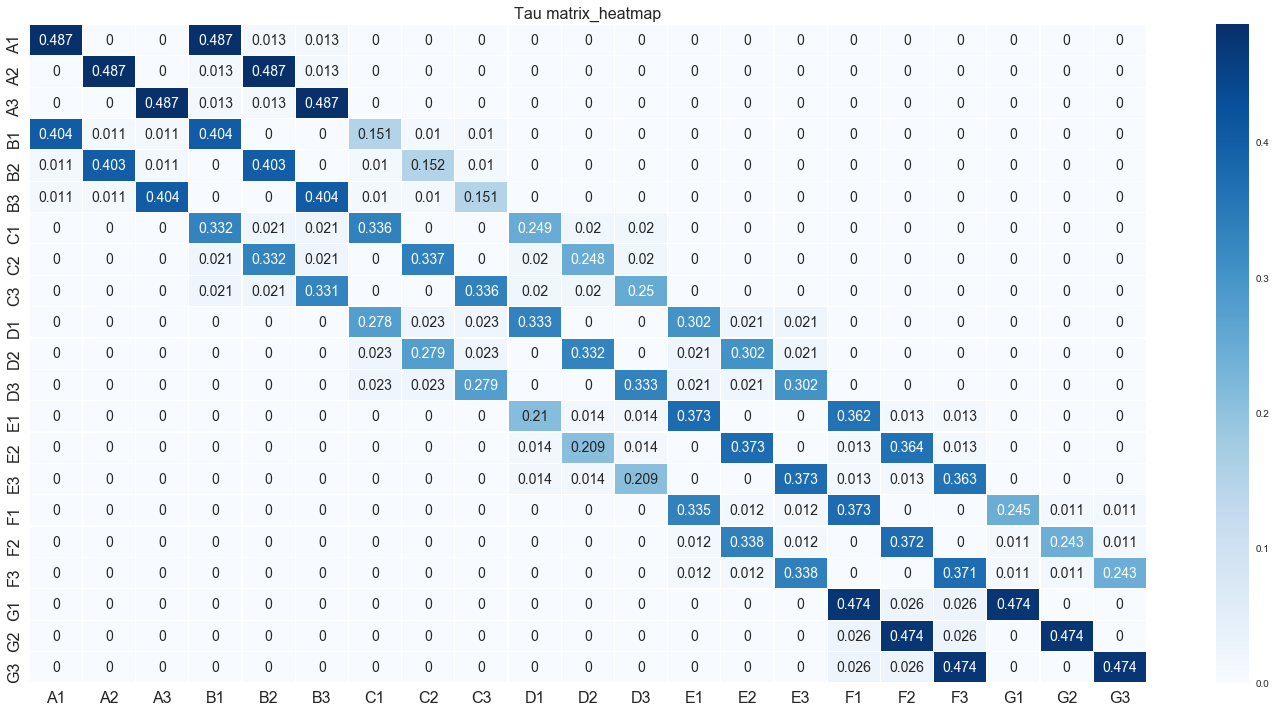

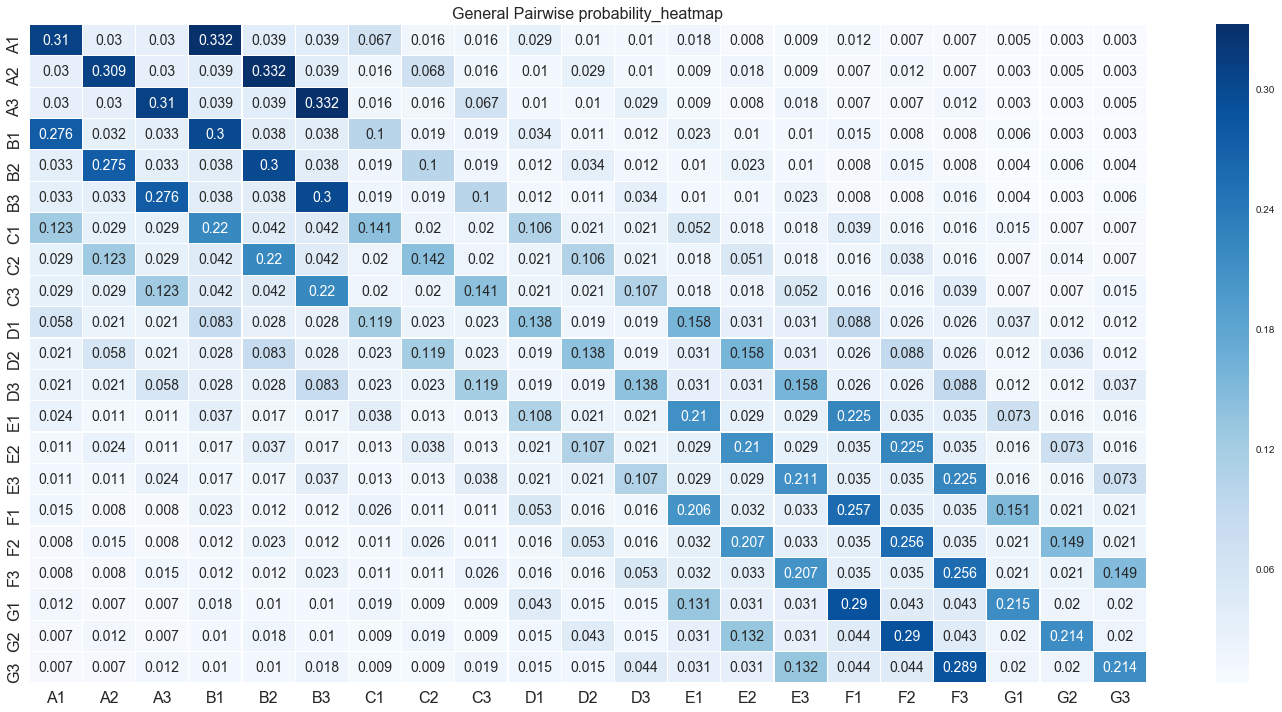

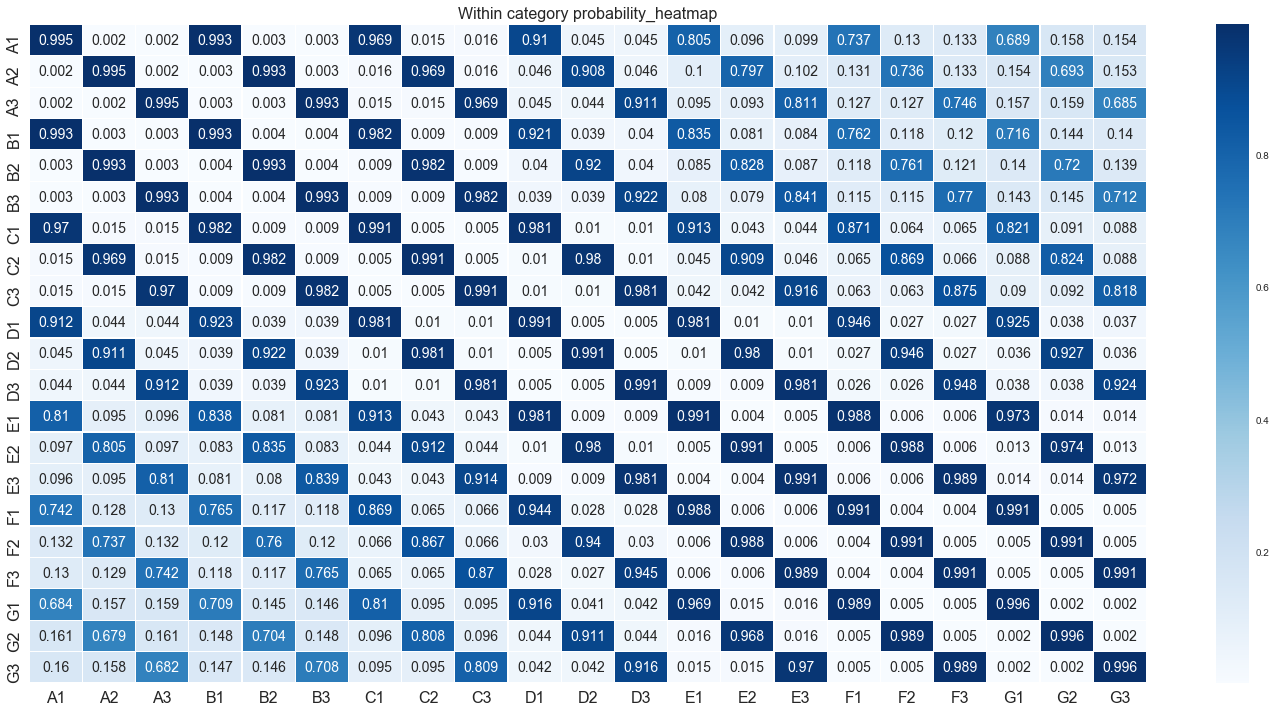

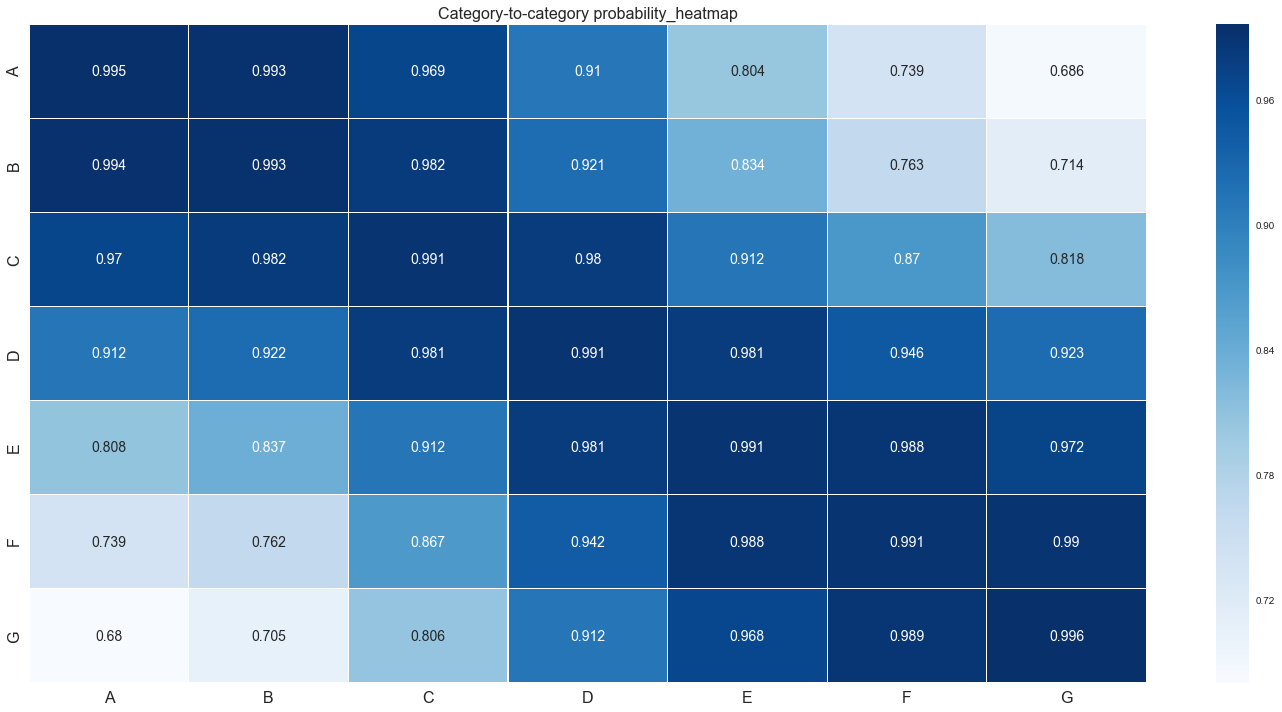

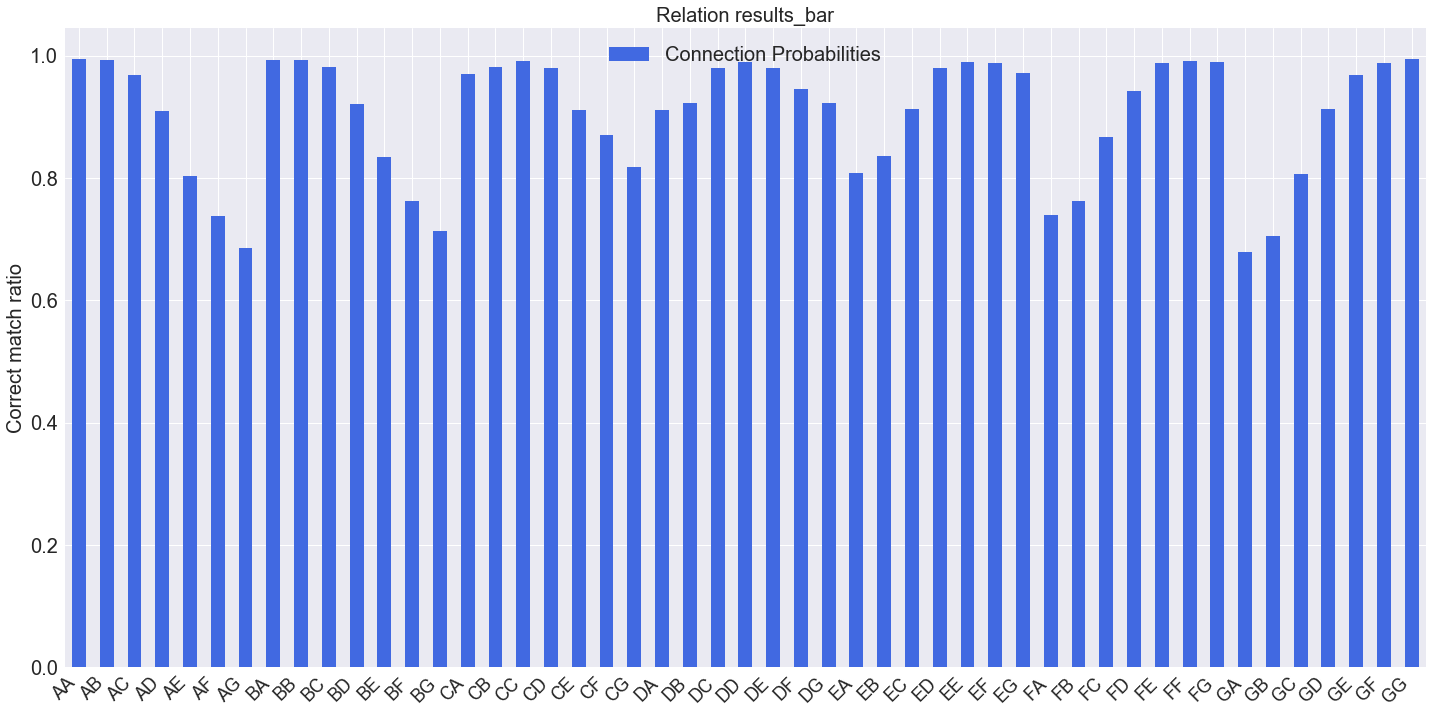

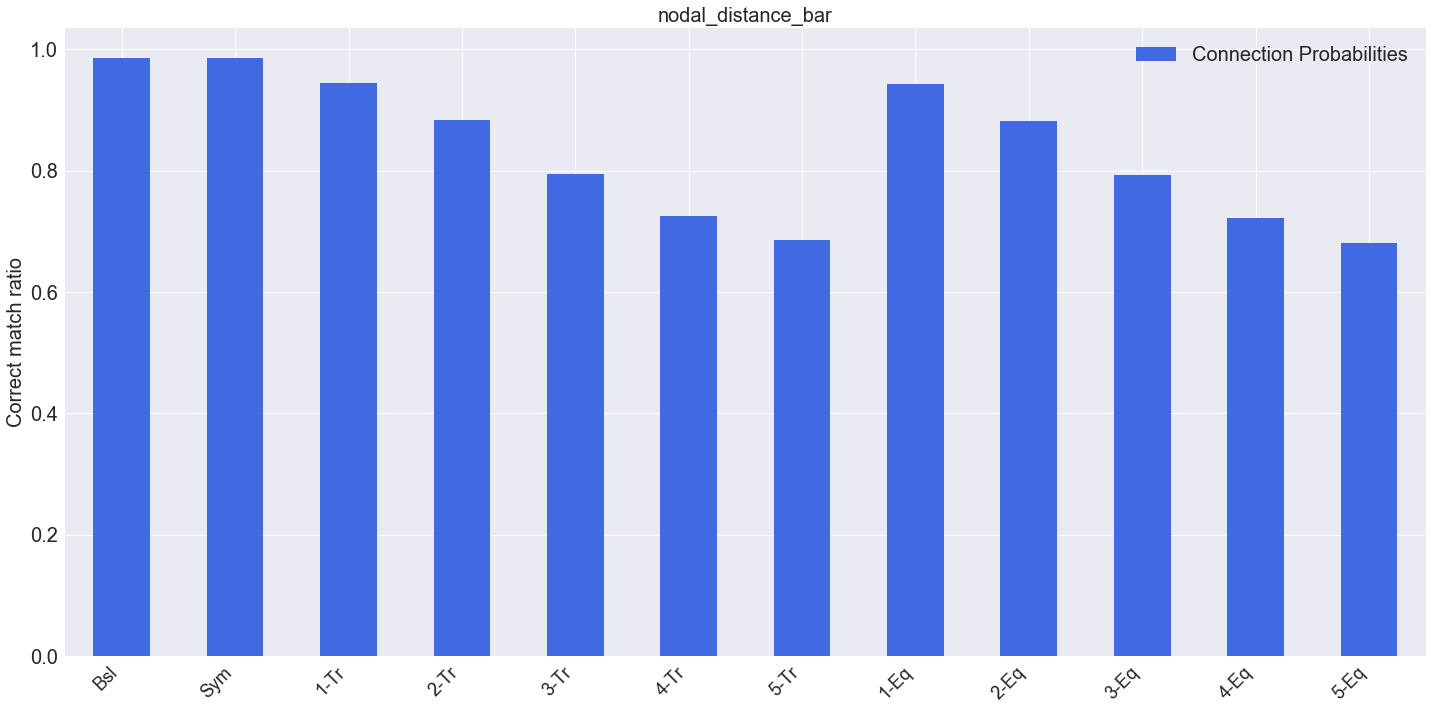

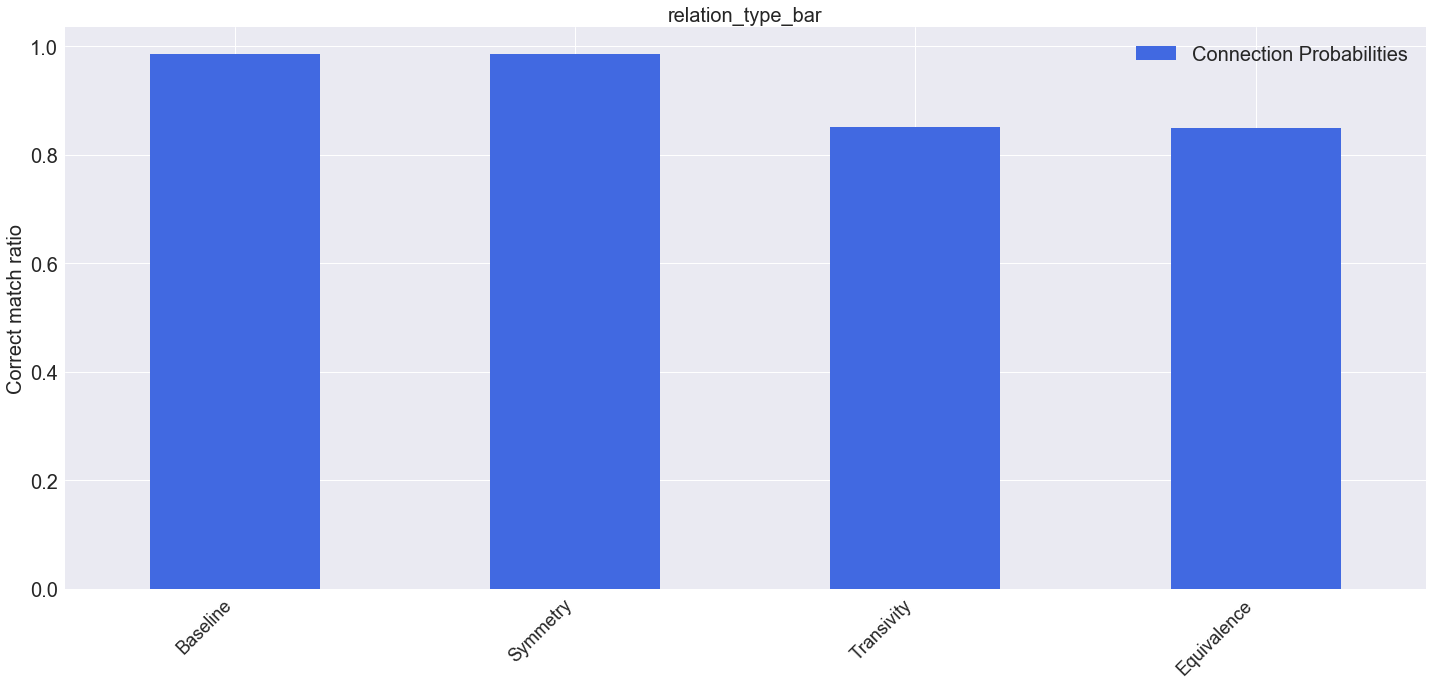

In [6]:
#import initialization
#import initialization_detail
%matplotlib inline 
import environment as env
import agent as agn
import interaction as intrc
import matplotlib as plt
plt.rc('figure', figsize=(20.0, 10.0))

environment_detail = environment_details()
environment_parameter, agent_parameter = config()

# Give the file_name to plot a previousely saved simulation
file_name = None
#file_name = 'results/Env_4_ExpID_1.p'

if file_name == None:
    agent = agn.Agent(agent_parameter)
    environment = env.Environment(environment_parameter)
    interaction = intrc.Interaction(agent, environment, agent_parameter,
                                                        environment_parameter)
    interaction.run_save()
    file_name = interaction.file_name
    print(file_name)

plt_ = intrc.Plot_results(file_name)
plt_.print_setting()
plt_.showResults()

## Assumptions/Constraints 

- Percept (sample stimulus) and action_set (comparison stimuli) belong to two different categories. 
-  When blocks are constructed by environment, the order of comparison stimuli and the order of trials in the block are random.

- There is two phases in the model, training with feedback and testing without feedback. In real experiments with human subjects during training, the feedback will be reduced to say $75\%$, $50\%$, and $25\%$ and it is to see if the participant remember the relations. In a synthetic and probabilistic model, the argument is not valid and we did not consider this case. 

## License

MIT license (MIT-LICENSE or http://opensource.org/licenses/MIT)